# Spam Or Ham: SMS Classifier 📱🤖📲

In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics

In [2]:
#Loading Data
data1=pd.read_csv('TrainDataset.csv')

In [3]:
data2=pd.read_csv('TestDataset.csv')

In [4]:
data1


,v1,v2
0,spam,U were outbid by simonwatson5120 on the Shinco...
1,ham,Do you still have the grinder?
2,ham,No. Yes please. Been swimming?
3,ham,No de.am seeing in online shop so that i asked.
4,ham,"Faith makes things possible,Hope makes things ..."
...,...,...
4452,ham,Good. Good job. I like entrepreneurs
4453,ham,Living is very simple.. Loving is also simple....
4454,ham,Msgs r not time pass.They silently say that I ...
4455,ham,What is this 'hex' place you talk of? Explain!


In [5]:
data2

,v2
0,Prabha..i'm soryda..realy..frm heart i'm sory
1,"Jus chillaxin, what up"
2,Ok no prob. Take ur time.
3,Congrats! 2 mobile 3G Videophones R yours. cal...
4,Thankyou so much for the call. I appreciate yo...
...,...
1110,Yo chad which gymnastics class do you wanna ta...
1111,God created gap btwn ur fingers so dat sum1 vr...
1112,I'm working technical support :)voice process.
1113,I told your number to gautham..


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4457 entries, 0 to 4456
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      4457 non-null   object
 1   v2      4457 non-null   object
dtypes: object(2)
memory usage: 69.8+ KB


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v2      1115 non-null   object
dtypes: object(1)
memory usage: 8.8+ KB


In [8]:
#we will change the column names
data1.rename(columns={'v1':"Target"},inplace=True)
data1.rename(columns={'v2':'Text'},inplace=True)

In [9]:
data2.rename(columns={'v2':'Text'},inplace=True)

In [10]:
data1

,Target,Text
0,spam,U were outbid by simonwatson5120 on the Shinco...
1,ham,Do you still have the grinder?
2,ham,No. Yes please. Been swimming?
3,ham,No de.am seeing in online shop so that i asked.
4,ham,"Faith makes things possible,Hope makes things ..."
...,...,...
4452,ham,Good. Good job. I like entrepreneurs
4453,ham,Living is very simple.. Loving is also simple....
4454,ham,Msgs r not time pass.They silently say that I ...
4455,ham,What is this 'hex' place you talk of? Explain!


#### The Train dataset consists of 4457 messages in English. The data is designated as being ham or spam. Dataframe has two columns. The first column is "Target" indicating the class of message as ham or spam and the second "Text" column is the string of text.

<AxesSubplot:xlabel='Target', ylabel='count'>

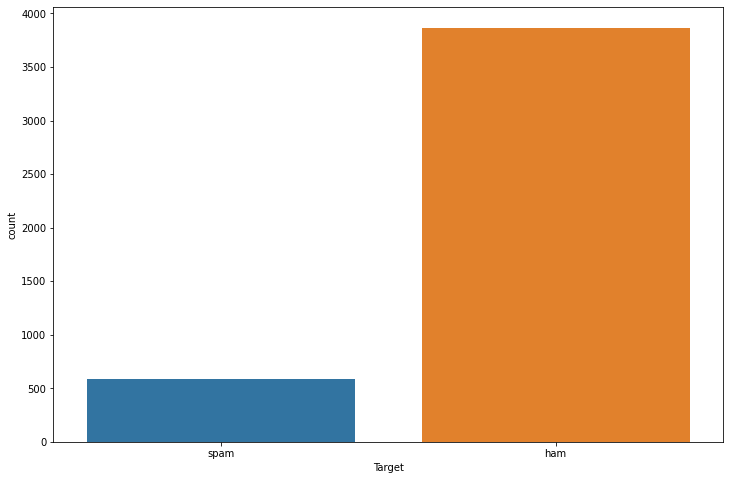

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(data1['Target'])

In [12]:
data1.head()

,Target,Text
0,spam,U were outbid by simonwatson5120 on the Shinco...
1,ham,Do you still have the grinder?
2,ham,No. Yes please. Been swimming?
3,ham,No de.am seeing in online shop so that i asked.
4,ham,"Faith makes things possible,Hope makes things ..."


#### For the purpose of data exploration, I am creating new features

No_of_Characters: Number of characters in the text message

No_of_Words: Number of words in the text message

No_of_sentence: Number of sentences in the text message

In [13]:
data1["No_of_Characters"] = data1["Text"].apply(len)
data1["No_of_Words"]=data1.apply(lambda row: nltk.word_tokenize(row["Text"]), axis=1).apply(len)
data1["No_of_sentence"]=data1.apply(lambda row: nltk.sent_tokenize(row["Text"]), axis=1).apply(len)


In [14]:
data1.describe()

,No_of_Characters,No_of_Words,No_of_sentence
count,4457.000000,4457.000000,4457.000000
mean,80.166704,18.737716,1.967691
std,59.916000,13.855503,1.434018
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,62.000000,15.000000,1.000000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,28.000000


In [15]:
data2["No_of_Characters"] = data2["Text"].apply(len)
data2["No_of_Words"]=data2.apply(lambda row: nltk.word_tokenize(row["Text"]), axis=1).apply(len)
data2["No_of_sentence"]=data2.apply(lambda row: nltk.sent_tokenize(row["Text"]), axis=1).apply(len)


In [16]:
data2.describe()

,No_of_Characters,No_of_Words,No_of_sentence
count,1115.000000,1115.000000,1115.000000
mean,79.927354,18.527354,1.982960
std,58.808388,13.286375,1.351466
min,2.000000,1.000000,1.000000
25%,35.000000,9.000000,1.000000
50%,59.000000,15.000000,2.000000
75%,121.500000,26.500000,3.000000
max,482.000000,113.000000,13.000000


<Figure size 864x576 with 0 Axes>

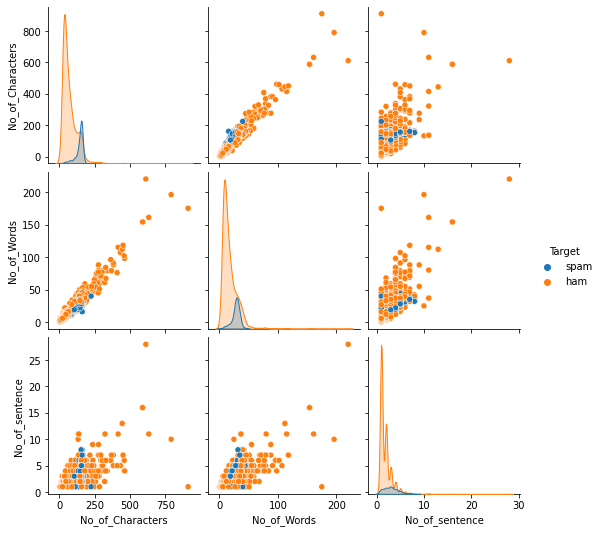

In [17]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data1, hue="Target")
plt.show(fg)

#### Note: 
From the pair plot, we can see a few outliers all in the class ham. This is interesting as we could put a cap over one of these. As they essentially indicate the same thing ie the length of SMS.

Next, I shall be dropping the outliers

In [18]:
#Dropping the outliers. 
data1 = data1[(data1["No_of_Characters"]<350)]
data1.shape

(4438, 5)

<Figure size 864x576 with 0 Axes>

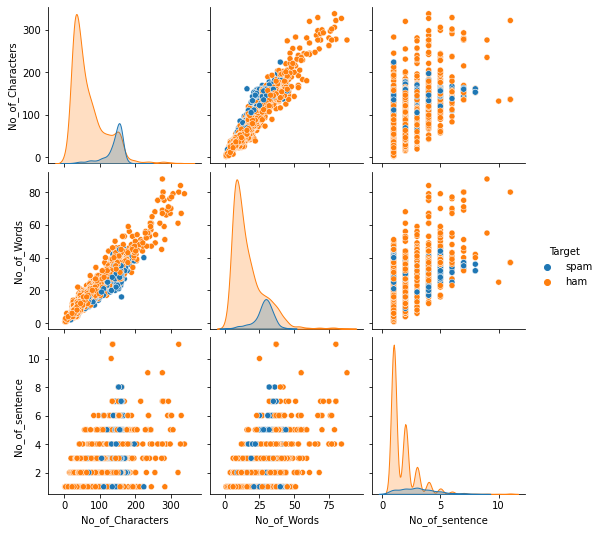

In [19]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data1, hue="Target")
plt.show(fg)



The data cleaning process NLP is crucial. The computer doesn’t understand the text. for the computer, it is just a cluster of symbols. To further process the data we need to make the data cleaner.

In the first step we extract only the alphabetic characters by this we are removing punctuation and numbers.
In the next step, we are converting all the characters into lowercase.
This text will be then used in further procrssing

In [20]:
#Lets have a look at a sample of texts before cleaning
print("\033[1m\u001b[45;1m The First 5 Texts:\033[0m",*data1["Text"][:5], sep = "\n")

 The First 5 Texts:
U were outbid by simonwatson5120 on the Shinco DVD Plyr. 2 bid again, visit sms. ac/smsrewards 2 end bid notifications, reply END OUT
Do you still have the grinder?
No. Yes please. Been swimming?
No de.am seeing in online shop so that i asked.
Faith makes things possible,Hope makes things work,Love makes things beautiful,May you have all three this Christmas!Merry Christmas!


In [21]:
#Lets have a look at a sample of texts before cleaning for test dataset
print("\033[1m\u001b[45;1m The First 5 Texts of test dataset:\033[0m",*data2["Text"][:5], sep = "\n")

 The First 5 Texts of test dataset:
Prabha..i'm soryda..realy..frm heart i'm sory
Jus chillaxin, what up
Ok no prob. Take ur time.
Congrats! 2 mobile 3G Videophones R yours. call 09061744553 now! videochat wid ur mates, play java games, Dload polyH music, noline rentl. bx420. ip4. 5we. 150pm
Thankyou so much for the call. I appreciate your care.


In [22]:
# Defining a function to clean up the text
def Clean(Text):
    sms = re.sub('[^a-zA-Z]', ' ', Text) #Replacing all non-alphabetic characters with a space
    sms = sms.lower() #converting to lowecase
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

data1["Clean_Text"] = data1["Text"].apply(Clean)
#Lets have a look at a sample of texts after cleaning
print("\033[1m\u001b[45;1m The First 5 Texts after cleaning:\033[0m",*data1["Clean_Text"][:5], sep = "\n")

 The First 5 Texts after cleaning:
u were outbid by simonwatson on the shinco dvd plyr bid again visit sms ac smsrewards end bid notifications reply end out
do you still have the grinder
no yes please been swimming
no de am seeing in online shop so that i asked
faith makes things possible hope makes things work love makes things beautiful may you have all three this christmas merry christmas


In [23]:
# Defining a function to clean up the text of test dataset
def Clean(Text):
    sms = re.sub('[^a-zA-Z]', ' ', Text) #Replacing all non-alphabetic characters with a space
    sms = sms.lower() #converting to lowecase
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

data2["Clean_Text"] = data2["Text"].apply(Clean)
#Lets have a look at a sample of texts after cleaning
print("\033[1m\u001b[45;1m The First 5 Texts of test dataset after cleaning:\033[0m",*data2["Clean_Text"][:5], sep = "\n")

 The First 5 Texts of test dataset after cleaning:
prabha i m soryda realy frm heart i m sory
jus chillaxin what up
ok no prob take ur time
congrats mobile g videophones r yours call now videochat wid ur mates play java games dload polyh music noline rentl bx ip we pm
thankyou so much for the call i appreciate your care


Tokenization is breaking complex data into smaller units called tokens. It can be done by splitting paragraphs into sentences and sentences into words. I am splitting the Clean_Text into words at this step.

In [24]:
data1["Tokenize_Text"]=data1.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)

print("\033[1m\u001b[45;1m The First 5 Texts after Tokenizing:\033[0m",*data1["Tokenize_Text"][:5], sep = "\n")

 The First 5 Texts after Tokenizing:
['u', 'were', 'outbid', 'by', 'simonwatson', 'on', 'the', 'shinco', 'dvd', 'plyr', 'bid', 'again', 'visit', 'sms', 'ac', 'smsrewards', 'end', 'bid', 'notifications', 'reply', 'end', 'out']
['do', 'you', 'still', 'have', 'the', 'grinder']
['no', 'yes', 'please', 'been', 'swimming']
['no', 'de', 'am', 'seeing', 'in', 'online', 'shop', 'so', 'that', 'i', 'asked']
['faith', 'makes', 'things', 'possible', 'hope', 'makes', 'things', 'work', 'love', 'makes', 'things', 'beautiful', 'may', 'you', 'have', 'all', 'three', 'this', 'christmas', 'merry', 'christmas']


In [25]:
data2["Tokenize_Text"]=data2.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)

print("\033[1m\u001b[45;1m The First 5 Texts of test data set after Tokenizing:\033[0m",*data2["Tokenize_Text"][:5], sep = "\n")


 The First 5 Texts of test data set after Tokenizing:
['prabha', 'i', 'm', 'soryda', 'realy', 'frm', 'heart', 'i', 'm', 'sory']
['jus', 'chillaxin', 'what', 'up']
['ok', 'no', 'prob', 'take', 'ur', 'time']
['congrats', 'mobile', 'g', 'videophones', 'r', 'yours', 'call', 'now', 'videochat', 'wid', 'ur', 'mates', 'play', 'java', 'games', 'dload', 'polyh', 'music', 'noline', 'rentl', 'bx', 'ip', 'we', 'pm']
['thankyou', 'so', 'much', 'for', 'the', 'call', 'i', 'appreciate', 'your', 'care']


Stopwords are frequently occurring words(such as few, is, an, etc). These words hold meaning in sentence structure, but do not contribute much to language processing in NLP. For the purpose of removing redundancy in our processing, I am removing those. NLTK library has a set of default stopwords that we will be removing.



In [26]:
# Removing the stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

data1["Nostopword_Text"] = data1["Tokenize_Text"].apply(remove_stopwords)

print("\033[1m\u001b[45;1m The First 5 Texts after removing the stopwords:\033[0m",*data1["Nostopword_Text"][:5], sep = "\n")

 The First 5 Texts after removing the stopwords:
['u', 'outbid', 'simonwatson', 'shinco', 'dvd', 'plyr', 'bid', 'visit', 'sms', 'ac', 'smsrewards', 'end', 'bid', 'notifications', 'reply', 'end']
['still', 'grinder']
['yes', 'please', 'swimming']
['de', 'seeing', 'online', 'shop', 'asked']
['faith', 'makes', 'things', 'possible', 'hope', 'makes', 'things', 'work', 'love', 'makes', 'things', 'beautiful', 'may', 'three', 'christmas', 'merry', 'christmas']


In [27]:
# Removing the stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

data2["Nostopword_Text"] = data2["Tokenize_Text"].apply(remove_stopwords)

print("\033[1m\u001b[45;1m The First 5 Texts of test dataset after removing the stopwords:\033[0m",*data2["Nostopword_Text"][:5], sep = "\n")

 The First 5 Texts of test dataset after removing the stopwords:
['prabha', 'soryda', 'realy', 'frm', 'heart', 'sory']
['jus', 'chillaxin']
['ok', 'prob', 'take', 'ur', 'time']
['congrats', 'mobile', 'g', 'videophones', 'r', 'call', 'videochat', 'wid', 'ur', 'mates', 'play', 'java', 'games', 'dload', 'polyh', 'music', 'noline', 'rentl', 'bx', 'ip', 'pm']
['thankyou', 'much', 'call', 'appreciate', 'care']


Stemming is the process of getting the root form of a word. Stem or root is the part to which inflectional affixes are added. The stem of a word is created by removing the prefix or suffix of a word. It goes back to the etymology of the word. Languages evolve over time. Many different languages branch into each other; for example, English is a derivative of Latin. Thus, stemming a word takes it back to the root word.

lemmatization also converts a word to its root form. However, the difference is that lemmatization ensures that the root word belongs to the language one is dealing with, in our case it is English. If we use lemmatization the output would be in English.

In [28]:
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    #word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

data1["Lemmatized_Text"] = data1["Nostopword_Text"].apply(lemmatize_word)
print("\033[1m\u001b[45;1m The First 5 Texts after lemitization:\033[0m",*data1["Lemmatized_Text"][:5], sep = "\n")

 The First 5 Texts after lemitization:
['u', 'outbid', 'simonwatson', 'shinco', 'dvd', 'plyr', 'bid', 'visit', 'sms', 'ac', 'smsrewards', 'end', 'bid', 'notifications', 'reply', 'end']
['still', 'grinder']
['yes', 'please', 'swim']
['de', 'see', 'online', 'shop', 'ask']
['faith', 'make', 'things', 'possible', 'hope', 'make', 'things', 'work', 'love', 'make', 'things', 'beautiful', 'may', 'three', 'christmas', 'merry', 'christmas']


In [29]:
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    #word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

data2["Lemmatized_Text"] = data2["Nostopword_Text"].apply(lemmatize_word)
print("\033[1m\u001b[45;1m The First 5 Texts of test dataset after lemitization:\033[0m",*data2["Lemmatized_Text"][:5], sep = "\n")

 The First 5 Texts of test dataset after lemitization:
['prabha', 'soryda', 'realy', 'frm', 'heart', 'sory']
['jus', 'chillaxin']
['ok', 'prob', 'take', 'ur', 'time']
['congrats', 'mobile', 'g', 'videophones', 'r', 'call', 'videochat', 'wid', 'ur', 'mat', 'play', 'java', 'game', 'dload', 'polyh', 'music', 'noline', 'rentl', 'bx', 'ip', 'pm']
['thankyou', 'much', 'call', 'appreciate', 'care']


TF-IDF in NLP stands for Term Frequency – Inverse document frequency. In NLP cleaned data needs to be converted into a numerical format where each word is represented by a matrix. This is also known as word embedding or Word vectorization.

Term Frequency (TF) = (Frequency of a term in the document)/(Total number of terms in documents) Inverse Document Frequency(IDF) = log( (total number of documents)/(number of documents with term t)) I will be using TfidfVectorizer() to vectorize the preprocessed data.

Steps in the Vectorizing:

Creating a corpus of lemmatized text
Converting the corpus in vector form
Label Encoding the classes in Target
Note: So far we have been stalking up columns in our data for the purpose of explanation


In [30]:
#Creating a corpus of text feature to encode further into vectorized form
corpus1= []
for i in data1["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus1.append(msg)
    
corpus1[:5]
print("\033[1m\u001b[45;1m The First 5 lines in corpus :\033[0m",*corpus1[:5], sep = "\n")

 The First 5 lines in corpus :
u outbid simonwatson shinco dvd plyr bid visit sms ac smsrewards end bid notifications reply end
still grinder
yes please swim
de see online shop ask
faith make things possible hope make things work love make things beautiful may three christmas merry christmas


In [31]:
#Creating a corpus of text feature to encode further into vectorized form
corpus2= []
for i in data2["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus2.append(msg)
    
corpus2[:5]
print("\033[1m\u001b[45;1m The First 5 lines of test dataset in corpus :\033[0m",*corpus2[:5], sep = "\n")

 The First 5 lines of test dataset in corpus :
prabha soryda realy frm heart sory
jus chillaxin
ok prob take ur time
congrats mobile g videophones r call videochat wid ur mat play java game dload polyh music noline rentl bx ip pm
thankyou much call appreciate care


In [32]:
#Changing text data in to numbers. 
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus1).toarray()
#Let's have a look at our feature 
X.dtype

dtype('float64')

In [33]:
#Label encode the Target and use it as y
label_encoder = LabelEncoder()
data1["Target"] = label_encoder.fit_transform(data1["Target"])

Steps involved in the Model Building

Setting up features and target as X and y
Splitting the testing and training sets
Build a pipeline of model for four different classifiers.
Naïve Bayes
RandomForestClassifier
KNeighborsClassifier
Support Vector Machines
Fit all the models on training data
Get the cross-validation on the training set for all the models for accuracy

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [35]:
#Setting values for labels and feature as y and X(we already did X in vectorizing...)
y = data1["Target"] 
# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_svc)

  

97.86


In [37]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

97.52


In [38]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

97.07


In [40]:
# K Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_knn)

91.44


In [53]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc_nb = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_nb)

97.3


In [42]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines','Random Forest', 'Gradient Boosting Classifier','K Neighbor Classifier','MultinomialNB'],
    'Score': [acc_svc, 
              acc_randomforest,
               acc_gbk,acc_knn,acc_nb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,97.86
1,Random Forest,97.52
4,MultinomialNB,97.30
2,Gradient Boosting Classifier,97.07
3,K Neighbor Classifier,91.44


In [51]:
classifiers = [MultinomialNB(), 
               RandomForestClassifier(),
               KNeighborsClassifier(), 
               SVC()]

In [56]:
# Model Evaluation
# creating lists of varios scores
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    i.fit(X_train, y_train)
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = i.score(X_train,y_train)
    test_accuracy = i.score(X_test,y_test)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [59]:
# initialise data of lists.
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =classifiers)

In [60]:
cmap2 = ListedColormap(["#E2CCFF","#E598D8"])
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
MultinomialNB(),1.000000,0.798319,0.887850,0.972973,0.973803
RandomForestClassifier(),0.979592,0.806723,0.884793,0.971847,1.000000
KNeighborsClassifier(),1.000000,0.361345,0.530864,0.914414,0.919437
SVC(),0.990196,0.848739,0.914027,0.978604,0.998028


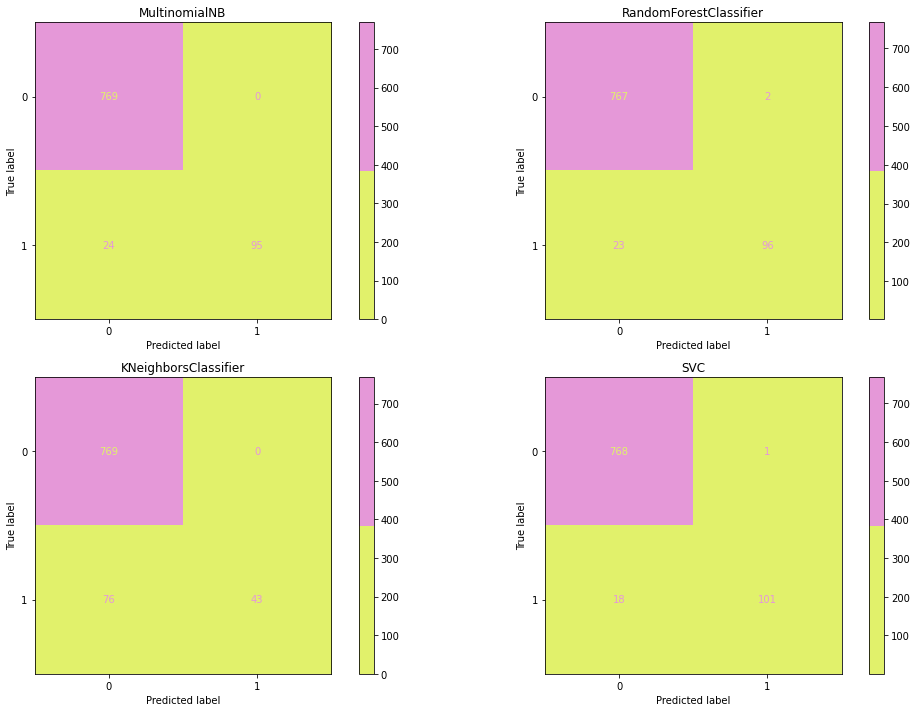

In [61]:
cmap = ListedColormap(["#E1F16B", "#E598D8"])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap= cmap,   
                          )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()